## Model Selection & Interpretation

In [22]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [23]:
# set filenames

filename = ('kenya_pre_processed_nlp.csv')

In [24]:
# read in kenya data

df = pd.read_csv(filename).set_index('LOAN_ID').drop(columns = 'Unnamed: 0')

In [25]:
#make sure we have what we expect.
df.head()

,DESCRIPTION_TRANSLATED,LOAN_USE,TAGS,STATUS
LOAN_ID,,,,
1799331,"['dinnah', 'year', 'age', 'proud', 'mother', '...","['buy', 'farm', 'input', 'seed', 'fertilizer',...",['parent'],1
1294719,"['resy', 'married', 'woman', 'blessed', 'kid',...","['purchase', 'chick', 'poultry', 'feed']","['animal', 'womanowned', 'business', 'voluntee...",1
1595847,"['lavenda', 'happily', 'married', 'blessed', '...","['add', 'stock', 'beauty', 'product', 'salon']","['user_favorite', 'parent', 'womanowned', 'bus...",0
1139606,"['hadija', 'kiva', 'borrower', 'describes', 'h...","['buy', 'stock', 'vegetable', 'flour', 'sugar'...","['repeat', 'borrower', 'womanowned', 'business']",1
1813411,"['purity', 'aged', 'lovely', 'mother', 'child'...","['purchase', 'highquality', 'seed', 'nutrientr...",['nan'],1


In [26]:
#check out the shape
df.shape

(50011, 4)

### Set up Variables

In [27]:
#set up X and y

X = df['DESCRIPTION_TRANSLATED']
y = df['STATUS']

In [28]:
#check for baseline
y.value_counts(normalize=True)

1    0.779688
0    0.220312
Name: STATUS, dtype: float64

In [29]:
#train-test split
X_train, X_test, y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=.2,
                                                 stratify=y,
                                                 random_state=42)

### Visualize Top Occurring Words/Phrases

In [59]:
tvec = TfidfVectorizer(ngram_range=(1,2), max_features=6_000)

In [60]:
tvec.fit(X_train)
X_train_tvec = tvec.transform(X_train)
X_test_tvec = tvec.transform(X_test)

In [61]:
X_train_tvec.shape

(40008, 6000)

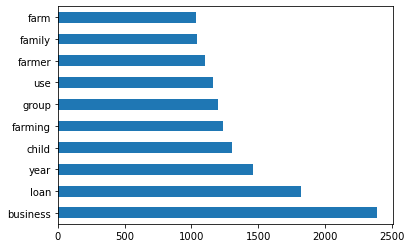

In [58]:
# top-occurring words
X_train_df_tvec = pd.DataFrame(tvec.fit_transform(X_train).todense(),
                         columns=tvec.get_feature_names())

X_train_df_tvec.sum().sort_values(ascending = False).head(10).plot(kind='barh');

In [67]:
# top-occurring words
success_df = pd.DataFrame(tvec.fit_transform(df['DESCRIPTION_TRANSLATED'][df['STATUS'] == 1]).todense(),
                         columns=tvec.get_feature_names())

expired_df = pd.DataFrame(tvec.fit_transform(df['DESCRIPTION_TRANSLATED'][df['STATUS'] == 0]).todense(),
                         columns=tvec.get_feature_names())

In [85]:
top_success = success_df.sum().sort_values(ascending = False).head(15)
top_expired = expired_df.sum().sort_values(ascending = False).head(15)

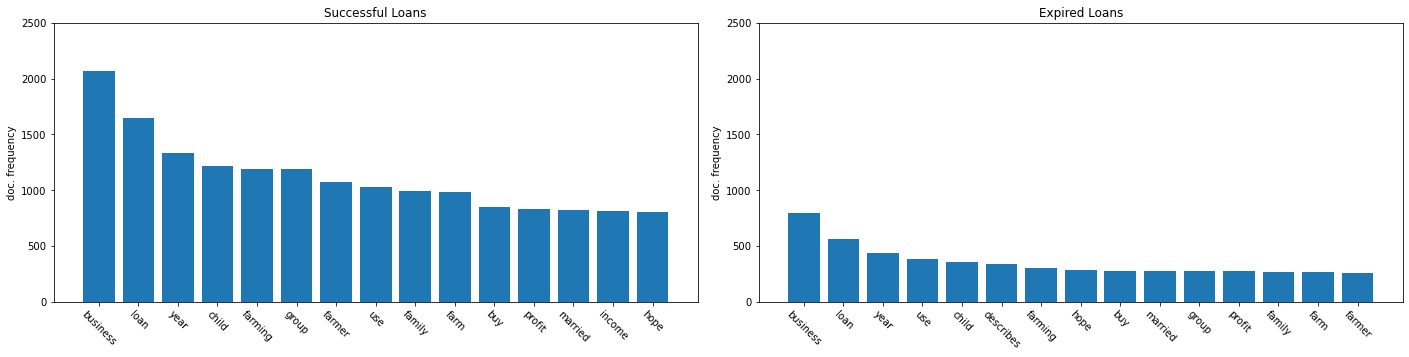

In [92]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5));
fig.tight_layout(pad =3)

ax1.bar(top_success.index, top_success);
ax1.set(title='Successful Loans', ylabel='doc. frequency');
ax1.tick_params('x', labelrotation=-45); 
ax1.set_ylim([0, 2500]);
ax2.bar(top_expired.index, top_expired);
ax2.set(title='Expired Loans', ylabel = 'doc. frequency');
ax2.tick_params('x', labelrotation=-45); 
ax2.set_ylim([0, 2500]);


# FINAL MODEL

-
Do final model 
plot confusion matrix
classification report
explore coefficients
top occuring phrases with ngram range

In [ ]:
logreg = LogisticRegression(C=1)

In [62]:
logreg.fit(X_train_tvec, y_train)

/Users/rachelinsler/ENTER/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [63]:
training_score = logreg.score(X_train_tvec, y_train)
testing_score = logreg.score(X_test_tvec, y_test)
cv_score = cross_val_score(logreg, X_train_tvec, y_train, cv=3).mean()
print(f'Training Score is:  {training_score}')
print(f'Testing Score is:  {testing_score}')
print(f'Cross-val score is: {cv_score}.')

/Users/rachelinsler/ENTER/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rachelinsler/ENTER/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Training Score is:  0.8140371925614877
Testing Score is:  0.803558932320304
Cross-val score is: 0.7996900619876025.


/Users/rachelinsler/ENTER/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Get Predictions

preds = logreg.predict(X_test_tvec)

# plot confusion matrix
cm = confusion_matrix(y_test, preds)

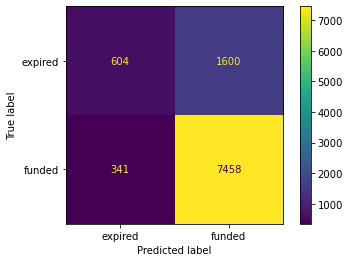

In [17]:
ConfusionMatrixDisplay(cm, display_labels = ['expired', 'funded']).plot();

In [18]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.64      0.27      0.38      2204
           1       0.82      0.96      0.88      7799

    accuracy                           0.81     10003
   macro avg       0.73      0.62      0.63     10003
weighted avg       0.78      0.81      0.77     10003



I'm interested to check out some of the posts that the model misclassifies

In [19]:
# Create DataFrame with column for true values.
results = pd.DataFrame(y_test)

#add in predictions
results['preds'] = (logreg.predict(X_test_tvec))
results.head()

,STATUS,preds
LOAN_ID,,
1226723,0,1
1419240,1,1
1841898,1,1
1076280,1,1
1009880,0,1


In [20]:
# Find all indices where predicted and true results 
# aren't the same, then save in an array.

row_ids = results[results['STATUS'] != results['preds']].index
print(row_ids[0:15])

Int64Index([1226723, 1009880, 1396076, 1565193, 1651852, 1544429, 1859127,
            1092472,  828202, 1011734, 1740174, 1143012,  825434, 1564254,
            1011650],
           dtype='int64', name='LOAN_ID')


In [21]:
#Create a dataframe of the misclassified descriptions  
misclassified = df.loc[row_ids]

In [ ]:
misclassified.shape

There are 2864 total misclassified posts.

In [ ]:
misclassified.head()

In [ ]:
misclassified['type'].value_counts(normalize=True)

In [ ]:
df['type'].value_counts(normalize=True)

Interesting - this model misclassifies comments more often than it does submissions, as evidenced by the over-representation of comments in "misclassified" relative to its prevalence in the dataset overall ('df'). This means it works much better on classifying submissions than comments. Let's see how it performs on submissions only. 

### Testing the Model on a Submission-Only Dataset

In [ ]:
#create a dataframe with only submissions
submission_df = df[df['type'] == 'submission']
submission_df.shape

In [ ]:
#pull a balanced sample
sample = submission_df.groupby('subreddit').sample(n = 15_000, random_state=42)


In [ ]:
#set up X and y

X = sample['text']
y = sample['subreddit']

In [ ]:
#check for baseline
y.value_counts(normalize=True)

In [ ]:
#train-test split
X_train, X_test, y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=.2,
                                                 stratify=y,
                                                 random_state=42)

In [ ]:
tvec = TfidfVectorizer(max_features = 12_500, ngram_range =(1, 2), stop_words=stop_words)

In [ ]:
logreg2 = LogisticRegression(C=0.1)

In [ ]:
tvec.fit(X_train)
X_train_tvec = tvec.transform(X_train)
X_test_tvec = tvec.transform(X_test)

In [ ]:
logreg2.fit(X_train_tvec, y_train)

In [ ]:
training_score = logreg2.score(X_train_tvec, y_train)
testing_score = logreg2.score(X_test_tvec, y_test)
cv_score = cross_val_score(logreg2, X_train_tvec, y_train, cv=3).mean()
print(f'Training Score is:  {training_score}')
print(f'Testing Score is:  {testing_score}')
print(f'Cross-val score is: {cv_score}.')

Pretty darn good with submissions!

In [ ]:
# Get Predictions

preds = logreg2.predict(X_test_tvec)

# Save confusion matrix values
cm = confusion_matrix(y_test, preds)
tn, fp, fn, tp = cm.ravel()

In [ ]:
ConfusionMatrixDisplay(cm, display_labels = ['books', 'writing']).plot();

In [ ]:
print(classification_report(y_test, preds))

If I had more time, I would go back and revisit my model exploration phase with a submission-only dataset. 

In [ ]:
#explore words and their coefficients 
coef_dict = {'coefficient': logreg2.coef_[0], 'words': tvec.get_feature_names()}
coef_df = pd.DataFrame(coef_dict)
coef_df.sort_values(by = 'coefficient', ascending=False, inplace=True)

In [ ]:
#check out the strongest positively correlated words 
coef_df.head(10)

In [ ]:
#check out the strongest negatively correlated words 
coef_df.tail(10)

### Exploring Where and When Classification Errors Happen

In [ ]:
#create a dictionary with the probability that a post belongs to 'writing'
predict_proba_dict = {'probability (writing)' : logreg2.predict_proba(X_test_tvec)[:,1],
                     'prediction' : logreg2.predict(X_test_tvec),
                     'actual' : y_test,
                     'post_text' : X_test}

In [ ]:
#turn it into a dataframe 
predict_proba_df = pd.DataFrame(predict_proba_dict)

In [ ]:
#look at posts with the lowest probability of belonging to "writing" that were misclassified
predict_proba_df.query('prediction != actual').sort_values(by='probability (writing)').head(10)

In [ ]:
#look at posts with the highest probability of belonging to "writing" that were misclassified
predict_proba_df.query('prediction != actual').sort_values(by='probability (writing)').tail(10)

If I had more time, I would have preserved the original post ids so I could easily tie the errors back to the original post text. 